In [53]:
#ML for cancer prediction

In [54]:
#import packages

In [137]:
#data handeling
import pandas as pd
import numpy as np

#data viz
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

#performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [56]:
#read data

In [57]:

file_path = "/Users/donu/Desktop/cancer_gene_expression.csv"

data = pd.read_csv(file_path)


In [58]:
#to check shape   
print(data.shape)

(801, 8001)


In [59]:
#to check columns
print(data.columns[0:5])

Index(['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5'], dtype='object')


In [60]:
#to check last column
print(data.columns[-1])

Cancer_Type


In [61]:
#to check the missing value
datanul = data.isnull().sum()
g=[i for i in datanul if i>0]
print('columns with missing value:%d'%len(g))

columns with missing value:0


In [62]:
#to check how many cancer types are present in the data

print(data['Cancer_Type'].value_counts())

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Cancer_Type, dtype: int64


Axes(0.125,0.11;0.775x0.77)


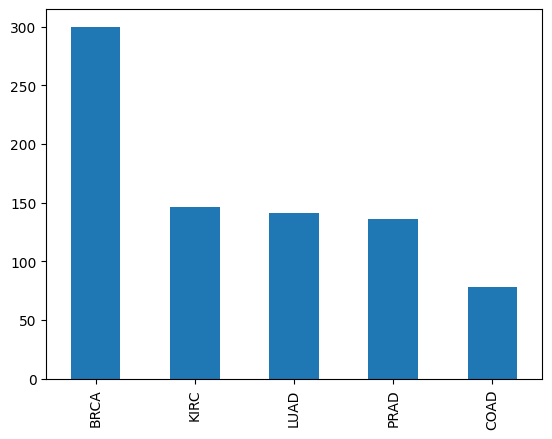

In [63]:
print(data['Cancer_Type'].value_counts().plot.bar())

Axes(0.22375,0.11;0.5775x0.77)


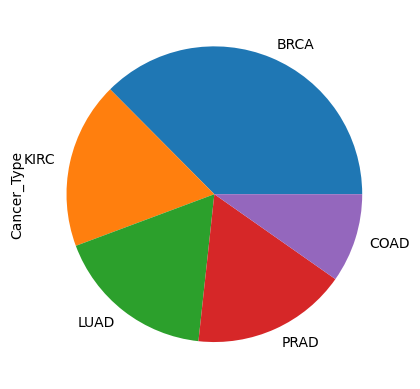

In [64]:
print(data['Cancer_Type'].value_counts().plot(kind='pie'))

In [65]:
#data Preprocessing

In [66]:
X=data.iloc[:,0:-1]
Y=data.iloc[:,-1]

print(X.shape)
print(Y.shape)

(801, 8000)
(801,)


In [67]:
data.iloc[0:10].describe()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7991,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000
count,10.0,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.0,0.092759,0.0,2.779896,0.053715,0.123462,0.123462,0.0,0.890072,2.233262,...,6.749257,11.806235,8.131110,4.986736,6.456521,11.558736,7.679897,10.197510,6.022993,2.145852
std,0.0,0.293331,0.0,1.067656,0.169861,0.390422,0.390422,0.0,1.082311,0.950822,...,1.316921,0.678852,0.778967,2.032392,0.430225,0.340154,0.710750,0.449820,2.007757,1.092992
min,0.0,0.000000,0.0,1.173191,0.000000,0.000000,0.000000,0.0,0.000000,0.690730,...,4.410348,11.062829,6.629291,0.943434,5.909027,11.011171,6.068034,9.596453,2.863046,0.839395
25%,0.0,0.000000,0.0,2.139328,0.000000,0.000000,0.000000,0.0,0.000000,1.707423,...,6.383223,11.261804,7.747753,3.959065,6.157794,11.275255,7.365427,9.887762,5.161144,1.590316
50%,0.0,0.000000,0.0,3.084558,0.000000,0.000000,0.000000,0.0,0.487925,2.323235,...,6.926317,11.504613,8.294410,5.098571,6.394054,11.624545,7.976824,10.173055,6.335341,1.938821
75%,0.0,0.000000,0.0,3.315225,0.000000,0.000000,0.000000,0.0,1.390297,2.795045,...,7.504211,12.433721,8.702729,6.229024,6.620236,11.738544,8.133202,10.410484,6.832559,2.412071
max,0.0,0.927593,0.0,4.746646,0.537147,1.234624,1.234624,0.0,2.779008,3.563817,...,8.417734,12.930699,9.032864,8.201139,7.371690,12.104985,8.426588,11.176890,9.141946,4.433988


In [68]:
#encoding
label_encoder = LabelEncoder()
label_encoder.fit(Y)
y_encoded = label_encoder.transform(Y)
labels = label_encoder.classes_
classes = np.unique(y_encoded)


In [69]:
print(labels)
print(classes)

['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']
[0 1 2 3 4]


In [70]:
#Data splitting

In [71]:
x_train,x_test,y_train,y_test = train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [72]:
#Data Normalization

min_max_scaler = MinMaxScaler()
x_train_norm = min_max_scaler.fit_transform(x_train)
x_test_norm = min_max_scaler.fit_transform(x_test)

In [73]:
type(x_train)

pandas.core.frame.DataFrame

In [74]:
x_train.iloc[0,3]

2.18164326123

In [75]:
x_train_norm[0,3]

0.4671305057022768

In [76]:
#feature selection

MI=mutual_info_classif(x_train_norm,y_train)


In [77]:
MI.shape

(8000,)

In [78]:
MI[0:5]

array([0.        , 0.04015616, 0.06819021, 0.05237047, 0.05047144])

In [79]:
feature=x_train.columns

In [80]:
feature.shape

(8000,)

In [81]:
feature[0:5]

Index(['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5'], dtype='object')

In [82]:
#now select feautures, lets say 300

n_features = 300
selected_score_indices=np.argsort(MI)[::-1][0:n_features]

In [83]:
x_train_selected = x_train_norm[:,selected_score_indices]
x_test_selected = x_test_norm[:,selected_score_indices]

In [84]:
x_train_selected.shape


(640, 300)

In [85]:
x_test_selected.shape

(161, 300)

In [86]:
#Random forest classifier

RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(x_train_selected,y_train)
y_pred = RF.predict(x_test_selected)
pred_prob = RF.predict_proba(x_test_selected)


In [87]:
#Model Evaluation

#accuracy
balanced_accuracy = np.round(balanced_accuracy_score(y_test, y_pred), 4)
print('balanced accuracy: %0.4f' % balanced_accuracy)

#precision
precision=np.round(precision_score(y_test,y_pred,average='weighted'),4)
print('precision:%0.4f' %precision)

#recall
recall=np.round(recall_score(y_test,y_pred,average='weighted'),4)
print('recall:%0.4f' %recall)

#f1_score
f1score=np.round(f1_score(y_test,y_pred,average='weighted'),4)
print('f1score:%0.4f' %f1score)

report=classification_report(y_test,y_pred,target_names=labels)
print('\n')
print('classification_report\n\n')
print(report)




balanced accuracy: 0.9633
precision:0.9759
recall:0.9752
f1score:0.9750


classification_report


              precision    recall  f1-score   support

        BRCA       0.97      0.98      0.98        60
        COAD       1.00      0.88      0.93        16
        KIRC       1.00      1.00      1.00        28
        LUAD       0.92      0.96      0.94        24
        PRAD       1.00      1.00      1.00        33

    accuracy                           0.98       161
   macro avg       0.98      0.96      0.97       161
weighted avg       0.98      0.98      0.98       161



In [88]:
#generate confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=labels,columns=labels)

In [108]:
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,59,0,0,1,0
COAD,1,14,0,1,0
KIRC,0,0,28,0,0
LUAD,1,0,0,23,0
PRAD,0,0,0,0,33


Text(50.722222222222214, 0.5, 'True Labels')

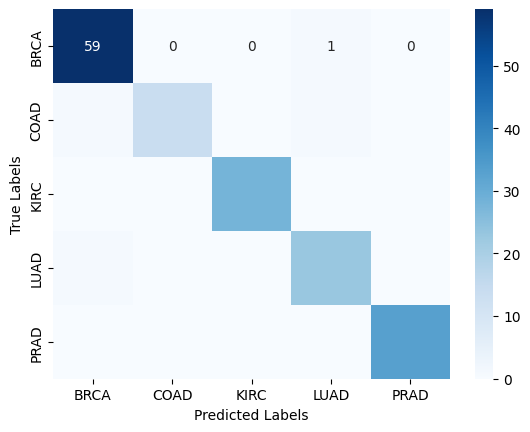

In [115]:
#vizualize the confusion matrixusing seaborn

sns.heatmap(cm_df,annot=True,cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

/Users/donu/miniconda3/envs/twin/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


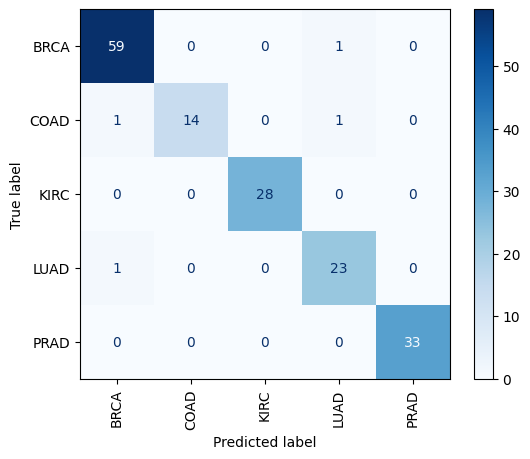

In [132]:
#vizualize the confusion matric directly

disp=plot_confusion_matrix(RF,x_test_selected,y_test,xticks_rotation='vertical',cmap='Blues',display_labels=labels)


In [133]:
pred_prob.shape

(161, 5)

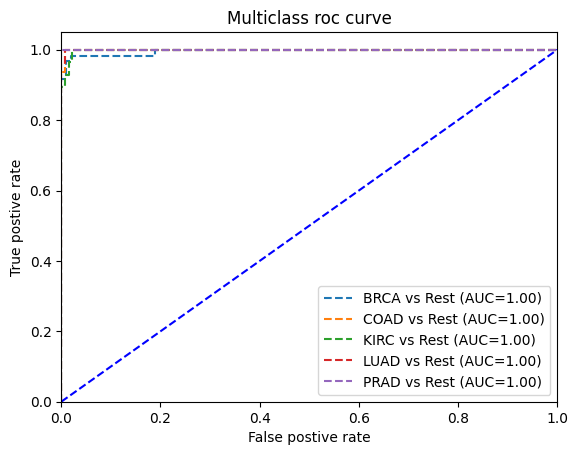

In [150]:
#roc curves will be generated for each classes
#we will therfore has to bonarize the y_test labels
#this is done because problities (pred_prob) are calculated for each classes
#we therefore need to put y_test labels is same format as pred_prob

y_test_binarized=label_binarize(y_test,classes=classes)

#roc curve for classes 
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]
 
for i in range(n_class):
    fpr[i], tpr[i], thresh[i], = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    #plotting
    
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(labels[i],roc_auc[i])
            )
             
plt.plot([0, 1], [0, 1], 'b--')
             
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass roc curve')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.legend(loc = 'lower right')
plt.show()